In [2]:
!pip install ssspy

In [3]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
from ssspy.utils.dataset import download_sample_speech_data

In [5]:
n_sources = 2
max_duration = 10
sisec2010_tag = "dev1_female3"

In [6]:
waveform_src_img, sample_rate = download_sample_speech_data(
    n_sources=n_sources,
    sisec2010_tag=sisec2010_tag,
    max_duration=max_duration,
    conv=False,
) # (n_channels, n_sources, n_samples)
waveform_mix = np.sum(waveform_src_img, axis=1)  # (n_channels, n_samples)

In [7]:
for idx, waveform in enumerate(waveform_mix):
    print("Mixture: {}".format(idx + 1))
    display(ipd.Audio(waveform, rate=sample_rate))
    print()

Mixture: 1


<IPython.lib.display.Audio object>


Mixture: 2


<IPython.lib.display.Audio object>

In [8]:
from ssspy.transform import whiten
from ssspy.bss.ica import NaturalGradICA

In [9]:
def contrast_fn(x):
    return np.log(1 + np.exp(x))

def score_fn(x):
    return 1 / (1 + np.exp(-x))

## Holonomic type

In [10]:
ica = NaturalGradICA(
    contrast_fn=contrast_fn, score_fn=score_fn, is_holonomic=True
)
print(ica)

NaturalGradICA(step_size=0.1, is_holonomic=True, record_loss=True)


In [11]:
waveform_est = ica(waveform_mix, n_iter=500)

In [12]:
for idx, waveform in enumerate(waveform_est):
    print("Estimated source: {}".format(idx + 1))
    display(ipd.Audio(waveform, rate=sample_rate))
    print()

Estimated source: 1


<IPython.lib.display.Audio object>


Estimated source: 2


<IPython.lib.display.Audio object>

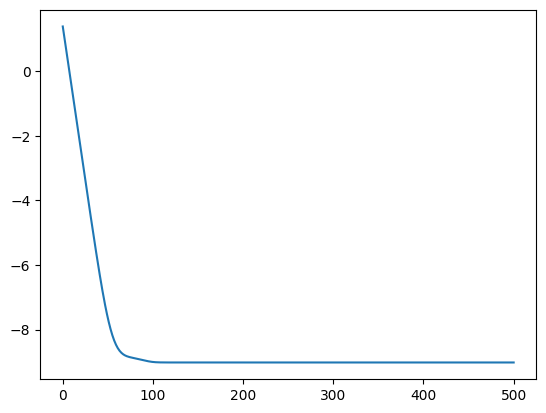

In [13]:
plt.figure()
plt.plot(ica.loss)
plt.show()
plt.close()

## Non-holonomic type

In [14]:
ica = NaturalGradICA(
    step_size=1e+0,
    contrast_fn=contrast_fn,
    score_fn=score_fn,
    is_holonomic=False
)
print(ica)

NaturalGradICA(step_size=1.0, is_holonomic=False, record_loss=True)


In [15]:
waveform_mix_whitened = whiten(waveform_mix)
waveform_est = ica(waveform_mix_whitened, n_iter=100)

In [16]:
for idx, waveform in enumerate(waveform_est):
    print("Estimated source: {}".format(idx + 1))
    display(ipd.Audio(waveform, rate=sample_rate))
    print()

Estimated source: 1


<IPython.lib.display.Audio object>


Estimated source: 2


<IPython.lib.display.Audio object>

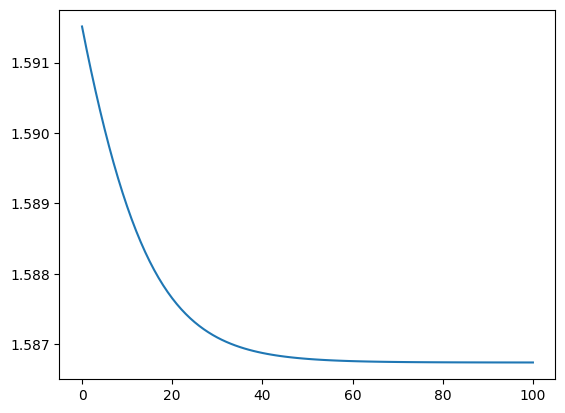

In [17]:
plt.figure()
plt.plot(ica.loss)
plt.show()
plt.close()